# Datos demográficos del Dataset

Se han recogido los datos de más de 50 personas. En este notebook se analizará la población de estos usuarios.

## Carga de datos

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [28]:
demografia = pd.read_csv('Demografia.csv')

demografia.head()

,Marca temporal,Género,Edad,"Nacionalidad(sin espacios, separado por comas)","Idiomas hablados(sin espacios, separado por comas)",Diestro o Zurdo
0,7/04/2025 9:27:18,Femenino,21,España,"Español,Inglés",Diestro
1,7/04/2025 9:47:30,No binario,21,España,"Gallego,Inglés,Español",Diestro
2,7/04/2025 10:36:29,Masculino,19,España,"Español,Inglés",Diestro
3,7/04/2025 11:14:39,Femenino,33,España,"Español,Inglés",Diestro
4,7/04/2025 11:46:00,Masculino,22,España,"Español,Inglés",Diestro


In [29]:
demografia["Idiomas hablados(sin espacios, separado por comas)"] = demografia["Idiomas hablados(sin espacios, separado por comas)"].str.split(",")
demografia["Nacionalidad(sin espacios, separado por comas)"] = demografia["Nacionalidad(sin espacios, separado por comas)"].apply(lambda x: "España" if x == "Español" or x== "Española" else x)

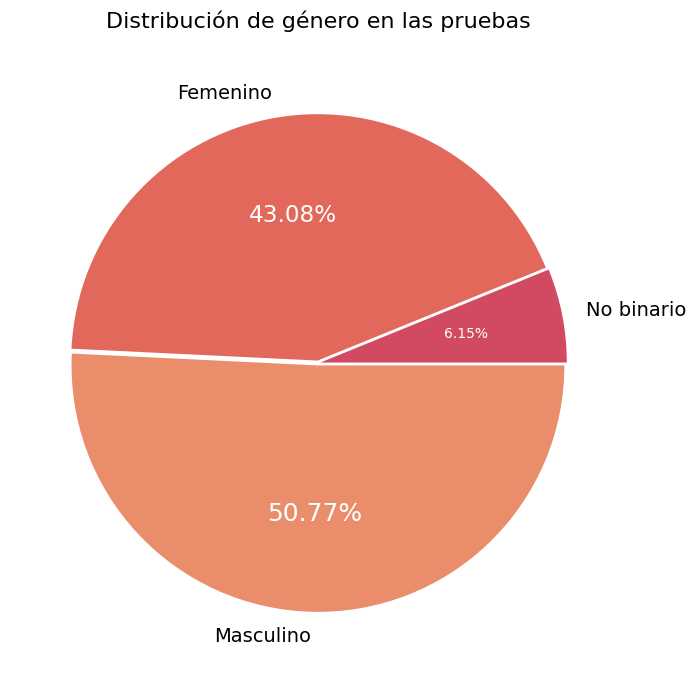

In [30]:
gender_percentage = demografia["Género"].value_counts(normalize=True) * 100
labels = gender_percentage.keys()

plt.figure(figsize=(8, 8))

patches, text, autotext = plt.pie(
    x=gender_percentage,
    labels=labels,
    autopct='%1.2f%%',
    colors=sns.color_palette("flare"),
    textprops={'fontsize': 14},
    counterclock=False,
    explode=(tuple(0.01 for _ in range(len(labels)))),
)

# Ajustar tamaño del texto según el valor del slice
for i, t in enumerate(autotext):
    percentage = gender_percentage.iloc[i]
    fontsize = np.interp(percentage, [gender_percentage.min(), gender_percentage.max()], [10, 18])
    t.set_color("white")
    t.set_fontsize(fontsize)

plt.title(
    label="Distribución de género en las pruebas",
    fontdict={"fontsize": 16},
    pad=20,
)

plt.savefig("./images/Distribución_de_genero_en_las_pruebas.png", dpi=300, bbox_inches='tight')
plt.show()


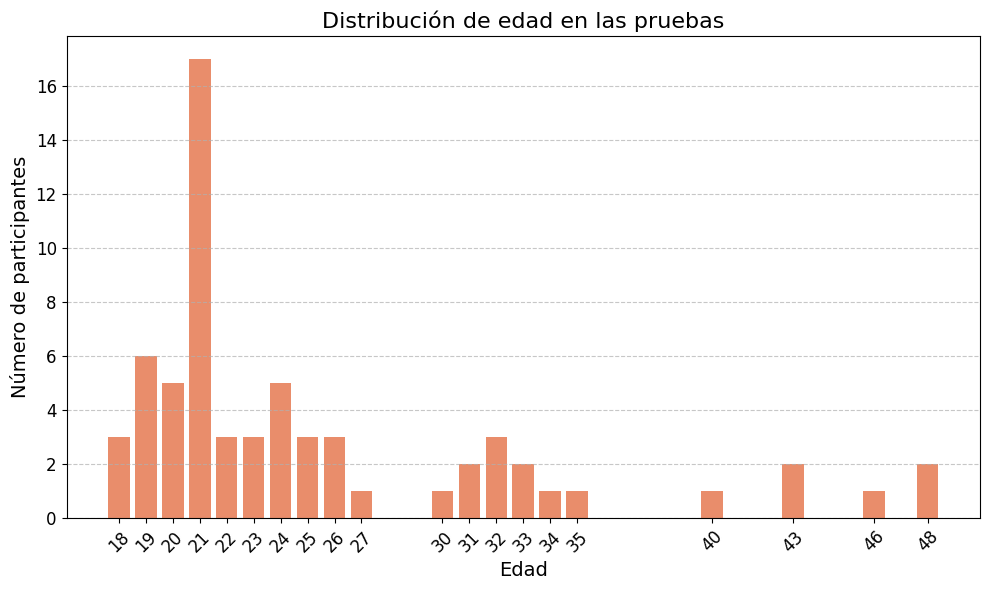

In [31]:
age_counts = demografia["Edad"].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(age_counts.index, age_counts.values, color=sns.color_palette("flare")[0])
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Número de participantes", fontsize=14)
plt.title("Distribución de edad en las pruebas", fontsize=16)
plt.xticks(age_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./images/Distribución_de_edad_en_las_pruebas.png", dpi=300, bbox_inches='tight')
plt.show()

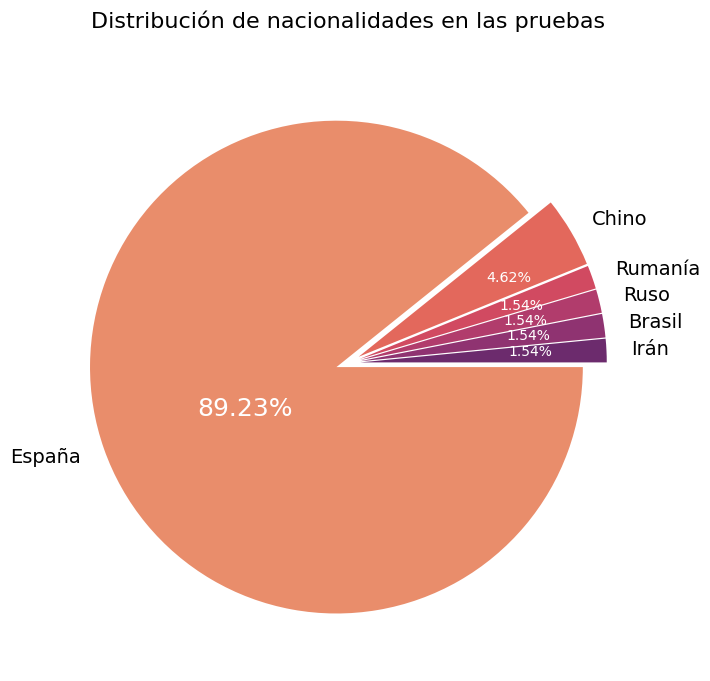

In [32]:
nationality_percentage = demografia["Nacionalidad(sin espacios, separado por comas)"].value_counts(normalize=True) * 100
labels = nationality_percentage.keys()

plt.figure(figsize=(8, 8))

patches, text, autotext = plt.pie(
    x=nationality_percentage,
    labels=labels,
    autopct='%1.2f%%',
    colors=sns.color_palette("flare"),
    textprops={'fontsize': 14},
    counterclock=False,
    explode=(tuple(0.05 for _ in range(len(labels)))),
)

# Ajustar tamaño del texto según el valor del slice
for i, t in enumerate(autotext):
    percentage = nationality_percentage.iloc[i]
    fontsize = np.interp(percentage, [nationality_percentage.min(), nationality_percentage.max()], [10, 18])
    t.set_color("white")
    t.set_fontsize(fontsize)
    t.set_horizontalalignment("left")
    t.set_verticalalignment("baseline")

plt.title(
    label="Distribución de nacionalidades en las pruebas",
    fontdict={"fontsize": 16},
    pad=20,
)

plt.savefig("./images/Distribución_de_nacionalidades_en_las_pruebas.png", dpi=300, bbox_inches='tight')
plt.show()


0             [Español, Inglés]
1    [Gallego, Inglés, Español]
2             [Español, Inglés]
3             [Español, Inglés]
4             [Español, Inglés]
Name: Idiomas hablados(sin espacios, separado por comas), dtype: object
['Español', 'Inglés']
['Gallego', 'Inglés', 'Español']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español']
['Español', 'Inglés']
['Español']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Francés', 'Valenciano', 'Inglés']
['Español', 'Gallego', 'Inglés', 'Francés', 'Japonés']
['Español', 'Inglés', 'Francés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español']
['Español', 'Inglés', 'Chino']
['Español', 'Inglés']
['Español', 'Inglés', 'Francés']
['Español', 'Inglés', 'Chino']
['Español', 'Francés', 'Ingles', 'Sueco']
['Español', 'Inglés']
['Español', 'Inglés']
['Español', 'Inglés']
['Español']
['Español', 'Inglés

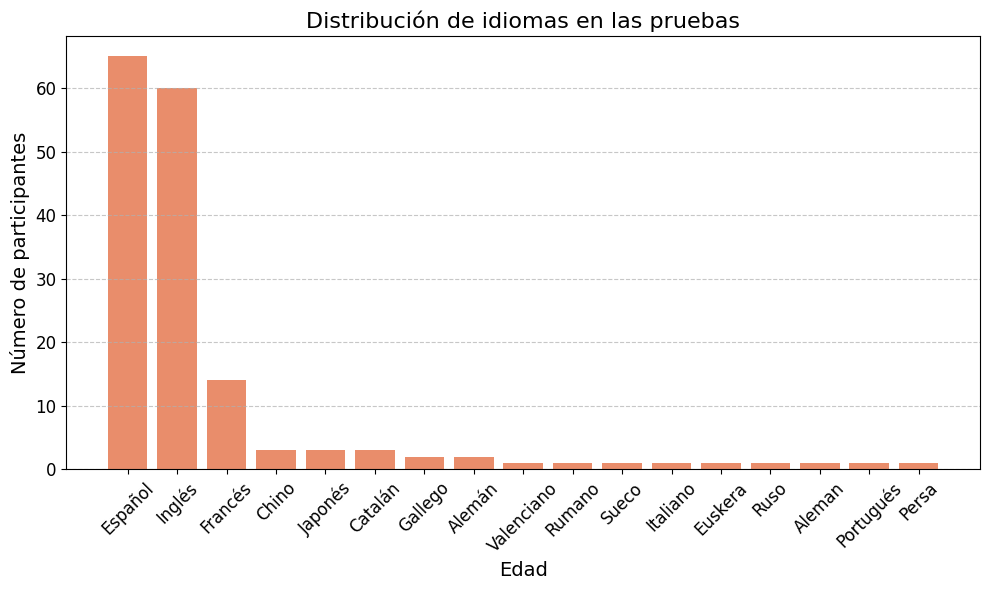

In [33]:
idiomas = demografia["Idiomas hablados(sin espacios, separado por comas)"].copy()
print(idiomas.head())
idiomas_aux = []
for index, row in idiomas.items():
    print(row)
    for idioma in row:
        if idioma == "Españo":
            idioma = "Español"
        if idioma == "Ingles":
            idioma = "Inglés"
        idiomas_aux.append(idioma)

idiomas = pd.DataFrame(idiomas_aux, columns=["Idiomas"])


language_count = idiomas["Idiomas"].value_counts()

print(language_count)

plt.figure(figsize=(10, 6))

plt.bar(language_count.index, language_count.values, color=sns.color_palette("flare")[0])
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Número de participantes", fontsize=14)
plt.title("Distribución de idiomas en las pruebas", fontsize=16)
plt.xticks(language_count.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./images/Distribución_de_idiomas_en_las_pruebas.png", dpi=300, bbox_inches='tight')
plt.show()

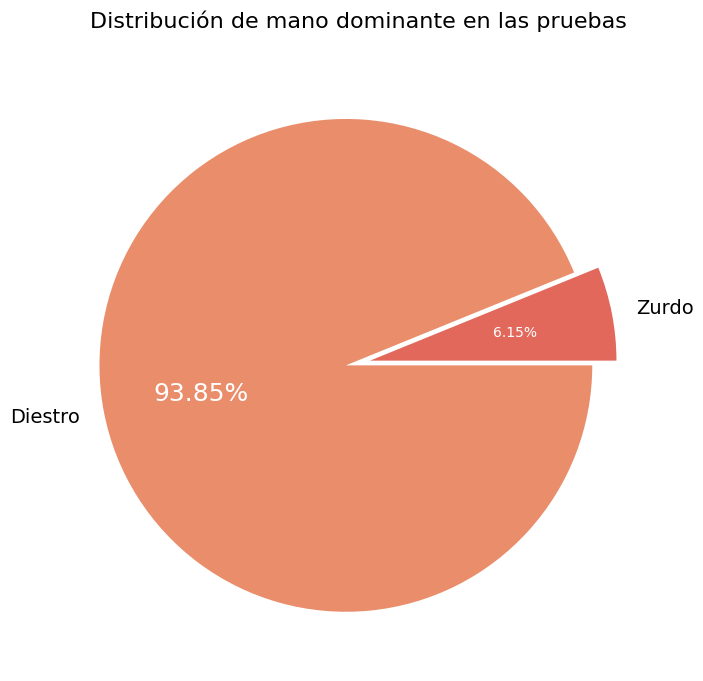

In [34]:
diestro_percentage = demografia["Diestro o Zurdo"].value_counts(normalize=True) * 100
labels = diestro_percentage.keys()

plt.figure(figsize=(8, 8))

patches, text, autotext = plt.pie(
    x=diestro_percentage,
    labels=labels,
    autopct='%1.2f%%',
    colors=sns.color_palette("flare"),
    textprops={'fontsize': 14},
    counterclock=False,
    explode=(tuple(0.05 for _ in range(len(labels)))),
)

# Ajustar tamaño del texto según el valor del slice
for i, t in enumerate(autotext):
    percentage = diestro_percentage.iloc[i]
    fontsize = np.interp(percentage, [diestro_percentage.min(), diestro_percentage.max()], [10, 18])
    t.set_color("white")
    t.set_fontsize(fontsize)
    # t.set_horizontalalignment("left")
    # t.set_verticalalignment("baseline")

plt.title(
    label="Distribución de mano dominante en las pruebas",
    fontdict={"fontsize": 16},
    pad=20,
)

plt.savefig("./images/Distribución_de_mano_dominante_en_las_pruebas.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
files = glob.glob("../src/dataset/full_animations/*_User_*.csv")

print(f"Total de animaciones: {len(files)}")

Total de animaciones: 975


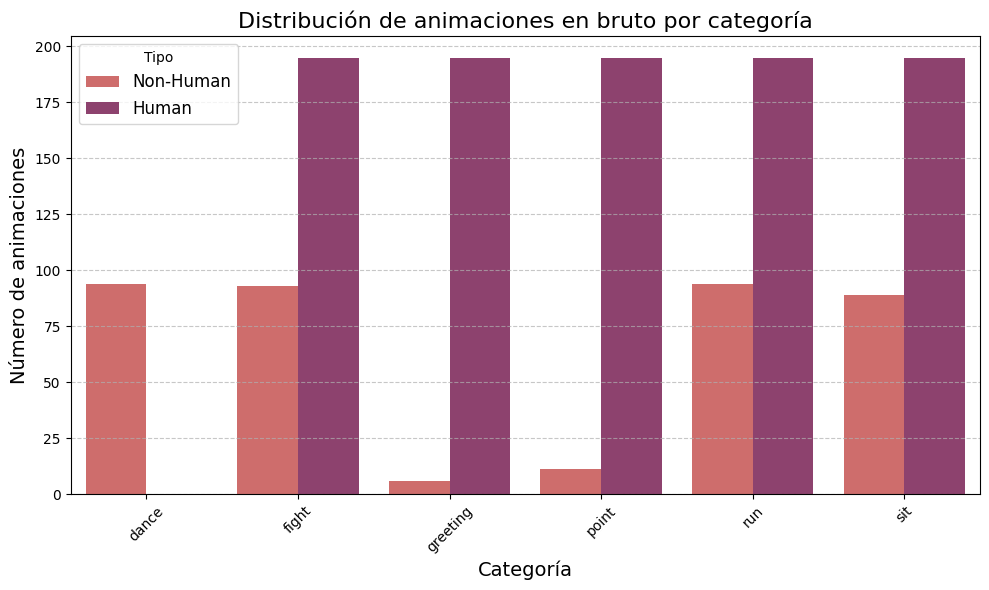

In [36]:
files = glob.glob("../src/dataset/full_animations/*.csv")
files_df = pd.DataFrame(columns=["file", "Category", "Human/Non-Human"])
data = []
for file in files:
    category = file.split("/")[-1].split("_")[0]
    human_status = "Human" if "User" in file else "Non-Human"
    data.append({
        "file": file,
        "Category": category,
        "Human/Non-Human": human_status
    })

files_df = pd.DataFrame(data)
count = files_df.groupby(["Category", "Human/Non-Human"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))

sns.barplot(data=count, x="Category", y="Count", hue="Human/Non-Human", palette="flare")
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Número de animaciones", fontsize=14)
plt.title("Distribución de animaciones en bruto por categoría", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Tipo", fontsize=12)
plt.tight_layout()
plt.savefig("./images/Distribución_de_animaciones_en_bruto_por_categoria.png", dpi=300, bbox_inches='tight')
plt.show()

Total de animaciones: 9951


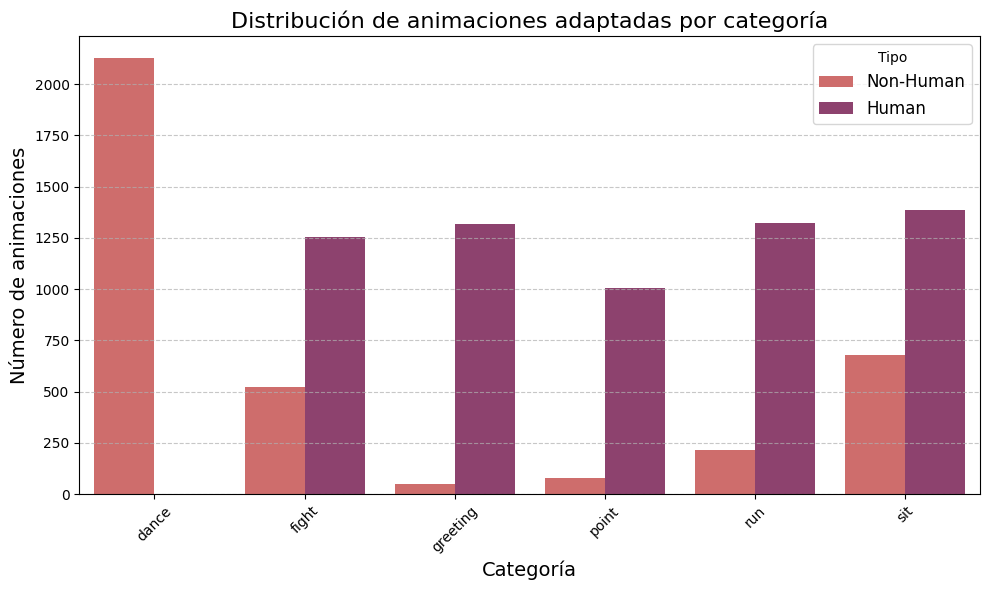

In [37]:
files = glob.glob("../src/dataset/splitted-animations/*.csv")
print(f"Total de animaciones: {len(files)}")
files_splitted_df = pd.DataFrame(columns=["file", "Category", "Human/Non-Human"])
data = []
for file in files:
    category = file.split("/")[-1].split("_")[0]
    human_status = "Human" if "User" in file else "Non-Human"
    data.append({
        "file": file,
        "Category": category,
        "Human/Non-Human": human_status
    })

files_splitted_df = pd.DataFrame(data)
count = files_splitted_df.groupby(["Category", "Human/Non-Human"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))

sns.barplot(data=count, x="Category", y="Count", hue="Human/Non-Human", palette="flare")
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Número de animaciones", fontsize=14)
plt.title("Distribución de animaciones adaptadas por categoría", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Tipo", fontsize=12)
plt.tight_layout()
plt.savefig("./images/Distribución_de_animaciones_adaptadas_por_categoria.png", dpi=300, bbox_inches='tight')
plt.show()